In [19]:
import pandas as pd
import CO2_functions
from CO2_functions import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
mycursor = sql_connect()

In [3]:
mycursor.execute("SELECT EPOCH_TIME,CH4_dry,CO2_dry FROM 2018_Picarro WHERE\
                    DATE = '2018-08-29' OR DATE = '2018-08-30' ORDER BY EPOCH_TIME asc")
data = mycursor.fetchall()
Picarro = pd.DataFrame(list(data))

In [4]:
Picarro.columns = ['EPOCH_TIME','Pic_CH4','Pic_CO2']

In [5]:
Picarro[Picarro.columns] = Picarro[Picarro.columns].apply(pd.to_numeric,errors='coerce')

In [6]:
Picarro['DT'] = pd.to_datetime(Picarro['EPOCH_TIME']-21600,unit='s')

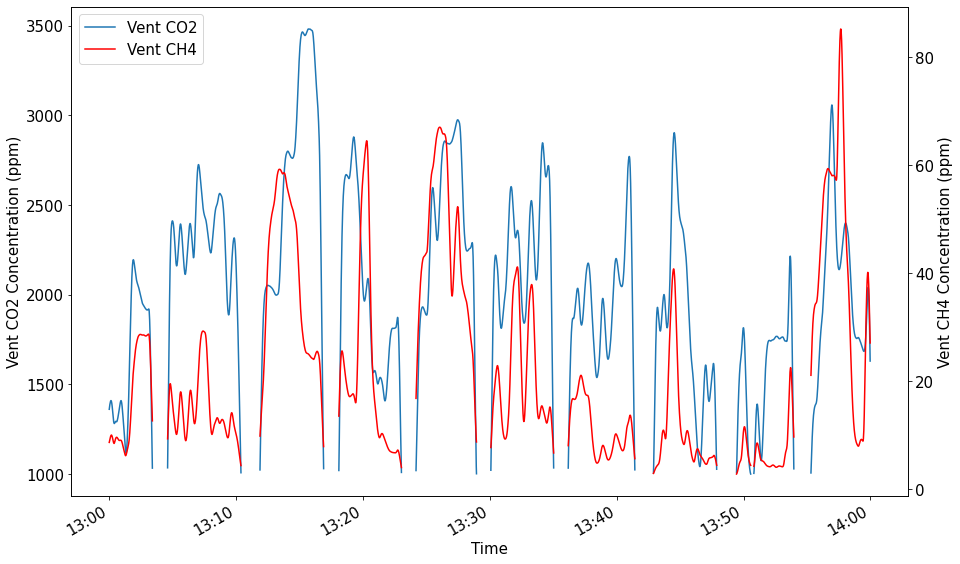

In [28]:
dt1 = '2018-08-29 13:00:00'
dt2 = '2018-08-29 14:00:00'

refined = Picarro.loc[(Picarro['DT']>dt1)&(Picarro['DT']<dt2)]


refined1 = refined.loc[refined['Pic_CO2']>1000].set_index('DT')
refined1 = refined1.resample('1s').mean()


labsize = 15

fig,ax1 = plt.subplots(figsize = (15,10))

line1 = ax1.plot(refined1['Pic_CO2'],label='Vent CO2')

ax2 = ax1.twinx()

line2 = ax2.plot(refined1['Pic_CH4'], color = 'red',label='Vent CH4')

ax1.set_ylabel('Vent CO2 Concentration (ppm)',size = labsize)
ax2.set_ylabel('Vent CH4 Concentration (ppm)',size = labsize)
ax1.set_xlabel('Time',size = labsize)

leg = line1 + line2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, fontsize = labsize,loc=2)

ax1.tick_params(axis='both', which='major', labelsize=labsize)
ax2.tick_params(axis='both', which='major', labelsize=labsize)

ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute =list(range(0,60,10))))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     #optional formatting 

plt.gcf().autofmt_xdate()
